<a href="https://colab.research.google.com/github/anshmehta337/deep-learning/blob/main/fashionmnistworking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import torch
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.optim as optim

In [8]:
training=datasets.FashionMNIST(
    root='data',
    train=True,
    download=True,
    transform=transforms.ToTensor()
)
test=datasets.FashionMNIST(
    root='data',
    train=False,
    download=True,
    transform=transforms.ToTensor()
)

In [9]:
len(training)

60000

In [10]:
len(test)

10000

In [11]:
image,label=training[0]

In [12]:
image.shape

torch.Size([1, 28, 28])

In [13]:
label

9

In [14]:
from matplotlib import pyplot as plt

In [15]:
image.squeeze().shape

torch.Size([28, 28])

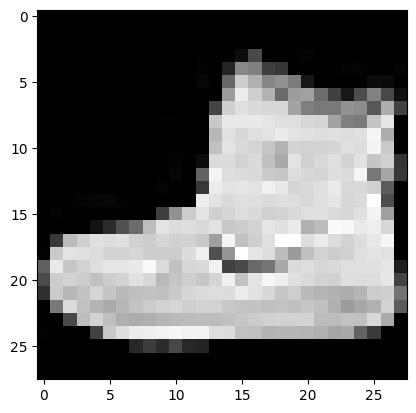

In [16]:
plt.imshow(image.squeeze(),cmap='gray')

In [17]:
from torch.utils.data import DataLoader

In [18]:
train_dataloader=DataLoader(training,batch_size=64,shuffle=True)
test_dataloader=DataLoader(test,batch_size=64,shuffle=True)

In [19]:
data_iter=iter(train_dataloader)
image,label=next(data_iter)

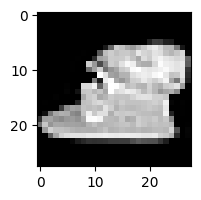

In [20]:
plt.figure(figsize=(2,2))
plt.imshow(image[5].squeeze(),cmap='gray')
plt.show()

In [21]:
label_map = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot"
}


In [22]:
label_map[label[5].item()]

'Ankle boot'

In [23]:
#lets train our model too


In [25]:
transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,),(0.5,))])

In [26]:
train_dataset=datasets.FashionMNIST(root='data',train=True,download=True,transform=transform)
test_dataset=datasets.FashionMNIST(root='data',train=False,download=True,transform=transform)

In [27]:
class DigitClassifier(nn.Module):
  def __init__(self):
    super().__init__()
    self.network=nn.Sequential(
        nn.Flatten(),
        nn.Linear(28*28,128),
        nn.ReLU(),
        nn.Linear(128,64),
        nn.ReLU(),
        nn.Linear(64,10)
    )
  def forward(self,x):
    return self.network(x)


In [40]:


model=DigitClassifier()
criterion=nn.CrossEntropyLoss()
optimizer=optim.Adam(model.parameters(),lr=0.002)

In [41]:

train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)


In [42]:
epochs=5
for epoch in range(epochs):
  curr=0.0
  for batch_idx,(images,labels) in enumerate(train_loader):
    optimizer.zero_grad()
    outputs=model(images)
    loss=criterion(outputs,labels)
    loss.backward()
    optimizer.step()
    curr+=loss.item()
  if (batch_idx+1)%100==0:
      print(f"Epoch [{epoch+1}/{epochs}], Step [{batch_idx+1}/{len(train_loader)}], Loss: {loss.item():.4f}")



In [44]:

model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on the test set: {100 * correct / total:.2f}%')

Accuracy on the test set: 86.77%
